In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [141]:
df = pd.read_csv("../glassdoor_jobs.csv", index_col=0)
print(df.shape)
df.sample(5)

(7984, 12)


,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue
487,"iOS Engineer, Augmented Reality",$149K,Snapchat is a camera and messaging app that co...,4.1,Snapchat,"Los Angeles, CA",1001 to 5000 Employees,2011,2011,Computer Hardware & Software,Information Technology,Unknown / Non-Applicable
90,-1,-1,-1,-1.0,-1,-1,-1,-1,-1,-1,-1,-1
335,iOS Engineer,$91K - $204K,Miles helps foster greener travel and rewards ...,4.3,Miles,"San Francisco, CA",1 to 50 Employees,2016,2016,NaN,Information Technology,Unknown / Non-Applicable
479,Scheduling Coordinator,$24K - $47K,Home Care Scheduler who is responsible for coo...,2.1,"CKCG Healthcare Services, Inc.","Norcross, GA",1 to 50 Employees,Private Practice / Firm,Private Practice / Firm,Health Care,Unknown / Non-Applicable,-1
287,Data Engineer,$79K - $157K,Overview:\nVNA Health Group is the state’s lar...,3.2,Visiting Nurse Association of Central Jersey,"Holmdel, NJ",1001 to 5000 Employees,1912,1912,Social Assistance,Non-Profit,$50 to $100 million (USD)


In [148]:
# drop duplicates
df = df.drop_duplicates()
print(df.shape)

# dropping all the rows where target column value (Salary Estimate) is missing
df = df[df['Salary Estimate']!='-1']
df = df.reset_index(drop=True)
print(df.shape)

# is salary per-hour or not?
df['hourly'] = df['Salary Estimate'].apply(lambda x: 1 if 'per hour' in x.lower() else 0)
df['employer_provided'] = df['Salary Estimate'].apply(lambda x: 1 if 'employer provided' in x.lower() else 0)

# parse salary range
salary = df['Salary Estimate'].apply(lambda x: (x.split('(')[0]).replace('$','').replace('K', ''))
salary_range = salary.apply(lambda x: x.lower().replace('per hour', '').replace('employer provided salary:', ''))

def get_max_salary(s):
    try:        
        return (int(s.split('-')[1]))
    except:
        return (int(s.split('-')[0]))

def get_location(s):
    try: 
        if(s.lower()=='Remote'):
            return 'Remote'
        elif(('los angeles' in s.lower()) or ('california' in s.lower())):
            return 'CA'
        elif('michigan' in s.lower()):
            return 'MI'
        elif('michigan' in s.lower()):
            return 'MI'
        else:
            return ((s.split(','))[1]).strip()        
    except:
        return s.strip()
    
def company_age(y):
    age=-1
    try:     
        if(y!='-1'):
            age = 2021 - int(y)
    except:
        age=-1
        
    return age
    

# get min, max, and average salary from salary range
df['min_salary'] = salary_range.apply(lambda x: int((x.split('-'))[0]))
df['max_salary'] = salary_range.apply(lambda x: get_max_salary(x))
df['avg_salary'] = (df['min_salary']+df['max_salary'])/2

# get job state
df['job_state'] = df['Location'].apply(lambda x: get_location(x))

# get company age
df['age'] = df.Founded.apply(lambda x: company_age(x))

# fill-in missing ratings with nans 
df.Rating = df.Rating.apply(lambda x: np.nan if x<1 else x)

# python
df['python_yn'] = df['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)
 
# r studio 
df['R_yn'] = df['Job Description'].apply(lambda x: 1 if 'r studio' in x.lower() or 'r-studio' in x.lower() else 0)
print(df.R_yn.value_counts())

# spark 
df['spark'] = df['Job Description'].apply(lambda x: 1 if 'spark' in x.lower() else 0)
print(df.spark.value_counts())

# aws 
df['aws'] = df['Job Description'].apply(lambda x: 1 if 'aws' in x.lower() else 0)
print(df.aws.value_counts())

# excel
df['excel'] = df['Job Description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)
print(df.excel.value_counts())

# sql
df['sql'] = df['Job Description'].apply(lambda x: 1 if 'sql' in x.lower() else 0)
print(df.sql.value_counts())

# django
df['django'] = df['Job Description'].apply(lambda x: 1 if 'django' in x.lower() else 0)
print(df.django.value_counts())

# hadoop
df['hadoop'] = df['Job Description'].apply(lambda x: 1 if 'hadoop' in x.lower() else 0)
print(df.hadoop.value_counts())

# java
df['java'] = df['Job Description'].apply(lambda x: 1 if 'java' in x.lower() else 0)
print(df.java.value_counts())

# db
df['db'] = df['Job Description'].apply(lambda x: 1 if 'database' in x.lower() else 0)
print(df.db.value_counts())

# tableau
df['tableau'] = df['Job Description'].apply(lambda x: 1 if 'tableau' in x.lower() else 0)
print(df.tableau.value_counts())

# azure
df['azure'] = df['Job Description'].apply(lambda x: 1 if 'azure' in x.lower() else 0)
print(df.azure.value_counts())

(4917, 33)
(4917, 33)
0    4913
1       4
Name: R_yn, dtype: int64
0    4888
1      29
Name: spark, dtype: int64
0    4734
1     183
Name: aws, dtype: int64
0    4358
1     559
Name: excel, dtype: int64
0    4570
1     347
Name: sql, dtype: int64
0    4913
1       4
Name: django, dtype: int64
0    4903
1      14
Name: hadoop, dtype: int64
0    4550
1     367
Name: java, dtype: int64
0    4458
1     459
Name: db, dtype: int64
0    4884
1      33
Name: tableau, dtype: int64
0    4867
1      50
Name: azure, dtype: int64


In [158]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'python' in title.lower():
        return 'python developer/engineer'
    elif 'research' in title.lower():
        return 'research engineer/scientist'
    elif 'devops' in title.lower():
        return 'devops'
    elif 'software' in title.lower():
        return 'software developer/engineer'
    else:
        return 'nan'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'director' in title.lower() or 'vp' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'junior' in title.lower() or 'associate' in title.lower() or 'graduate' in title.lower():
        return 'jr'
    else:
        return 'mid'
    

df['job_title_tag'] = df['Job Title'].apply(title_simplifier)
df['seniority'] = df['Job Title'].apply(seniority)
print(df['seniority'].value_counts())
print(df['job_title_tag'].value_counts())

mid       3750
senior    1074
jr          93
Name: seniority, dtype: int64
nan                            2952
analyst                        1023
software developer/engineer     684
data scientist                  110
data engineer                    58
research engineer/scientist      40
devops                           23
python developer/engineer        16
mle                              11
Name: job_title_tag, dtype: int64


[[<AxesSubplot:title={'center':'Rating'}>
  <AxesSubplot:title={'center':'hourly'}>
  <AxesSubplot:title={'center':'employer_provided'}>
  <AxesSubplot:title={'center':'min_salary'}>]
 [<AxesSubplot:title={'center':'max_salary'}>
  <AxesSubplot:title={'center':'avg_salary'}>
  <AxesSubplot:title={'center':'age'}>
  <AxesSubplot:title={'center':'python_yn'}>]
 [<AxesSubplot:title={'center':'R_yn'}>
  <AxesSubplot:title={'center':'spark'}>
  <AxesSubplot:title={'center':'aws'}>
  <AxesSubplot:title={'center':'excel'}>]
 [<AxesSubplot:title={'center':'sql'}>
  <AxesSubplot:title={'center':'django'}>
  <AxesSubplot:title={'center':'hadoop'}>
  <AxesSubplot:title={'center':'java'}>]
 [<AxesSubplot:title={'center':'db'}>
  <AxesSubplot:title={'center':'tableau'}>
  <AxesSubplot:title={'center':'azure'}> <AxesSubplot:>]]


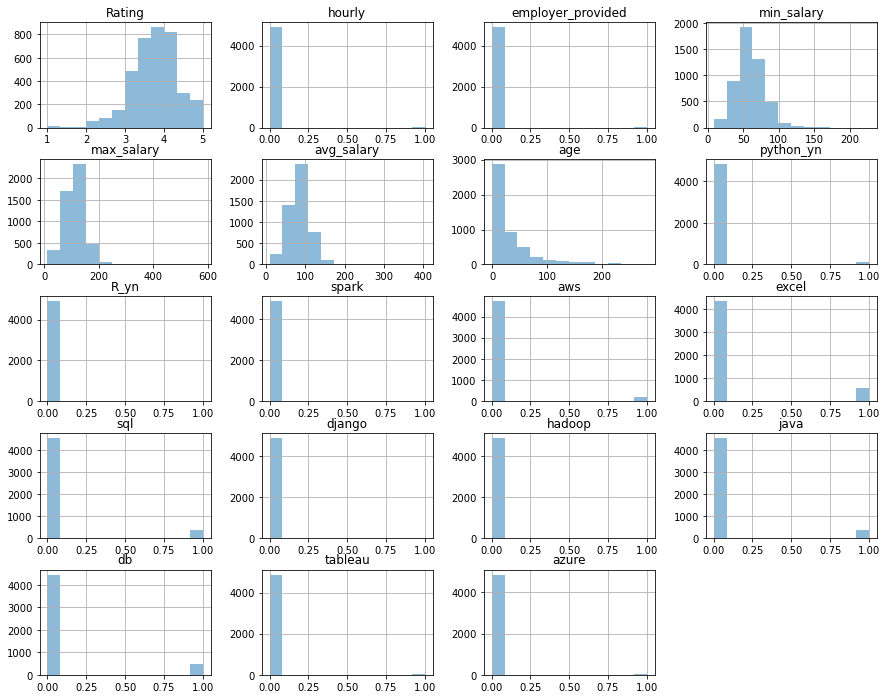

In [159]:
print(df.hist(bins=12, alpha=0.5, figsize=(15,12)))

In [160]:
df.describe()

,Rating,hourly,employer_provided,min_salary,max_salary,avg_salary,age,python_yn,R_yn,spark,aws,excel,sql,django,hadoop,java,db,tableau,azure
count,3784.000000,4917.000000,4917.000000,4917.000000,4917.000000,4917.000000,4917.000000,4917.000000,4917.000000,4917.000000,4917.000000,4917.000000,4917.000000,4917.000000,4917.000000,4917.000000,4917.000000,4917.000000,4917.000000
mean,3.753647,0.006711,0.006711,59.770795,112.948139,86.359467,29.468782,0.021354,0.000814,0.005898,0.037218,0.113687,0.070571,0.000814,0.002847,0.074639,0.093350,0.006711,0.010169
std,0.600214,0.081656,0.081656,20.314476,36.926223,27.861721,42.887350,0.144578,0.028513,0.076579,0.189314,0.317463,0.256134,0.028513,0.053289,0.262835,0.290951,0.081656,0.100337
min,1.000000,0.000000,0.000000,8.000000,11.000000,9.500000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.400000,0.000000,0.000000,47.000000,91.000000,69.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.800000,0.000000,0.000000,58.000000,112.000000,85.500000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.100000,0.000000,0.000000,71.000000,134.000000,102.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,1.000000,1.000000,227.000000,581.000000,404.000000,281.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [161]:
df.corr()

,Rating,hourly,employer_provided,min_salary,max_salary,avg_salary,age,python_yn,R_yn,spark,aws,excel,sql,django,hadoop,java,db,tableau,azure
Rating,1.000000,0.036136,0.056203,0.170383,0.175169,0.177960,-0.028332,0.022376,-0.005618,0.014954,0.012251,0.006882,0.033662,0.027208,-0.003743,-0.003820,0.008716,0.030818,0.046644
hourly,0.036136,1.000000,0.511876,-0.129427,-0.165978,-0.157172,-0.017976,-0.012142,-0.002345,-0.006331,-0.003003,0.001949,-0.012924,-0.002345,-0.004392,-0.023345,-0.017814,-0.006757,-0.008332
employer_provided,0.056203,0.511876,1.000000,-0.023476,-0.098785,-0.074020,-0.043185,-0.012142,-0.002345,-0.006331,0.010156,-0.005898,-0.012924,-0.002345,-0.004392,-0.023345,-0.009252,-0.006757,-0.008332
min_salary,0.170383,-0.129427,-0.023476,1.000000,0.885757,0.951523,0.082562,0.073836,-0.009862,0.050035,0.055376,-0.005547,0.042478,0.012613,0.029729,0.119708,0.019555,-0.022617,0.040863
max_salary,0.175169,-0.165978,-0.098785,0.885757,1.000000,0.985580,0.041120,0.066544,-0.006915,0.047802,0.045961,-0.015669,0.049725,0.019167,0.031501,0.112718,0.028624,-0.028151,0.050159
avg_salary,0.177960,-0.157172,-0.074020,0.951523,0.985580,1.000000,0.057348,0.071014,-0.008178,0.049917,0.050645,-0.012406,0.048437,0.017300,0.031713,0.118335,0.026097,-0.026900,0.048136
age,-0.028332,-0.017976,-0.043185,0.082562,0.041120,0.057348,1.000000,-0.009456,-0.004970,0.025048,0.025861,0.010428,-0.010234,-0.016115,-0.012333,0.003175,-0.010501,-0.005604,0.001019
python_yn,0.022376,-0.012142,-0.012142,0.073836,0.066544,0.071014,-0.009456,1.000000,-0.004215,0.227470,0.089868,0.080053,0.200994,0.193163,0.071315,0.198936,0.078331,0.125702,0.055141
R_yn,-0.005618,-0.002345,-0.002345,-0.009862,-0.006915,-0.008178,-0.004970,-0.004215,1.000000,-0.002198,-0.005610,-0.010219,0.019991,-0.000814,-0.001525,-0.008104,-0.009156,0.085022,-0.002892
spark,0.014954,-0.006331,-0.006331,0.050035,0.047802,0.049917,0.025048,0.227470,-0.002198,1.000000,0.097106,0.022617,0.113596,-0.002198,0.394662,0.069082,0.048323,0.026199,0.071615


<AxesSubplot:>

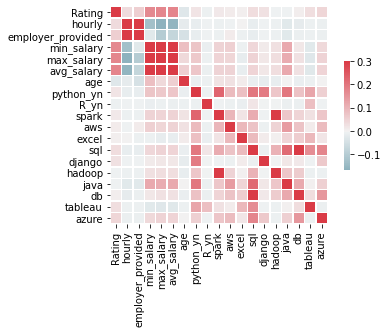

In [164]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df.corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})